# CASE STUDY - WORLD BANK
In questo file vengono utilizzate classi e metodi del package opandas_wb.api per analizzare e costruire grafici dai dati presi da World Bank. Gli oggetti utilizzati per rappresentare i dati sono: Topic, Indicator ed Observable. E’ presente un database di cache dove vengono salvati i dati richiesti per la prima volta da world bank, così da evitare ulteriori chiamate alle API World Bank per le richieste successive. Il database è costituito da quattro tabelle:
- Topics: id del topic, nome del topic, breve descrizione del topic
- Indicators: sigla dell’indicatore, nome esteso dell’indicatore, breve descrizione dell’indicatore
- Observables: sigla dell’indicatore di riferimento, paese di riferimento, anno dell’osservabile, valore dell’osservabile
- Tabella pivot per poter identificare tutti i topic relativi a un Indicator

Tutte le funzioni che permettono di graficare osservabili eseguono un controllo sui valori nulli, i quali per semplicità vengono esclusi dalle serie di osservabili. Inoltre tutte queste funzioni sono state testate precedentemente nei test presenti nella cartella /tests/ del progetto.

## Grafico con tre serie di osservabili

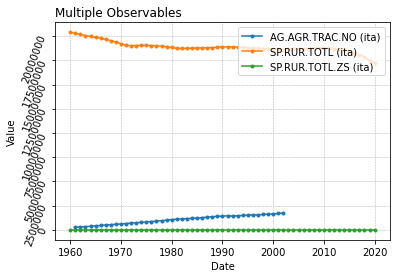

In [12]:
from src.opandas_wb.api.plots import *

ind_1 = 'AG.AGR.TRAC.NO'
ind_2 = 'SP.RUR.TOTL'
ind_3 = 'SP.RUR.TOTL.ZS'
country = 'ita'
indicators = [(ind_1, country), (ind_2, country), (ind_3, country)]
multi_indicator_plot(indicators).show()

# Grafico Media mobile

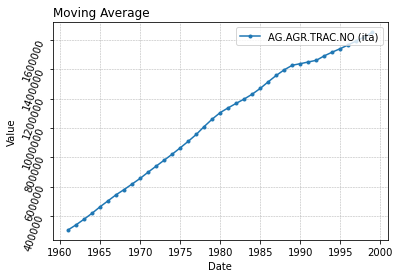

In [13]:
media_mobile(ind_1, 'ita', 3).show()

# Grafici delle covarianze

cov(AG.AGR.TRAC.NO,SP.RUR.TOTL)=-193974735025.69745


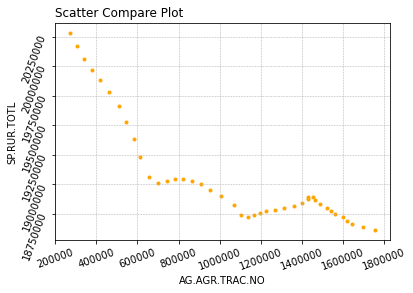

cov(AG.AGR.TRAC.NO,SP.RUR.TOTL.ZS)=-932980.7657119631


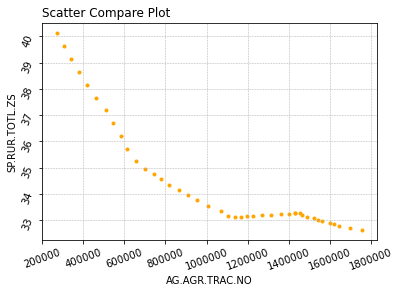

cov(SP.RUR.TOTL,SP.RUR.TOTL.ZS)=1423723.0456726772


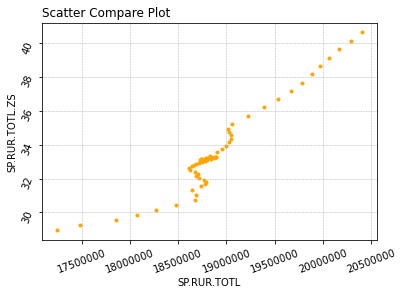

In [14]:
x_values = (ind_1, country)
y_values = (ind_2, country)
print("cov({},{})={}".format(ind_1, ind_2, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

x_values = (ind_1, country)
y_values = (ind_3, country)
print("cov({},{})={}".format(ind_1, ind_3, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

x_values = (ind_2, country)
y_values = (ind_3, country)
print("cov({},{})={}".format(ind_2, ind_3, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

# Grafici delle differenze prime

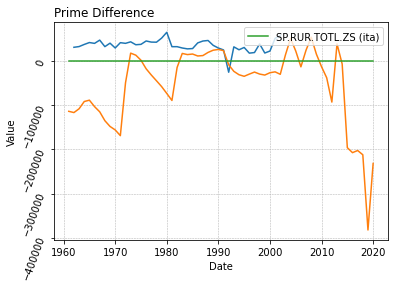

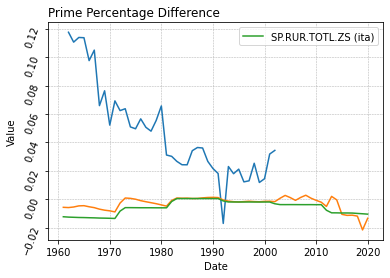

In [21]:
diff_prime(ind_1, country)
diff_prime(ind_2, country)
diff_prime(ind_3, country).show()
diff_prime_perc(ind_1, country)
diff_prime_perc(ind_2, country)
diff_prime_perc(ind_3, country).show()

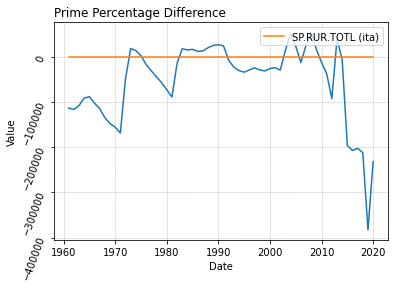

<module 'matplotlib.pyplot' from 'C:\\Users\\giaco\\.conda\\envs\\pythonProject\\lib\\site-packages\\matplotlib\\pyplot.py'>

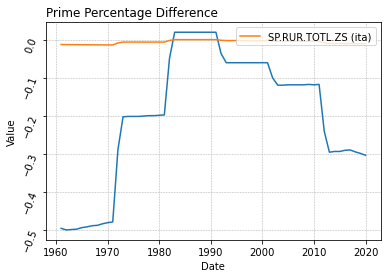

# Rette di regressione

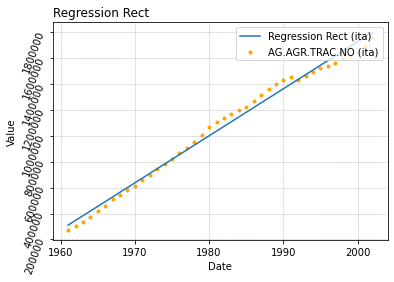

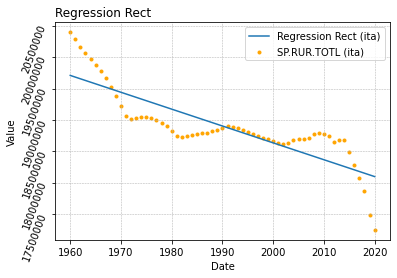

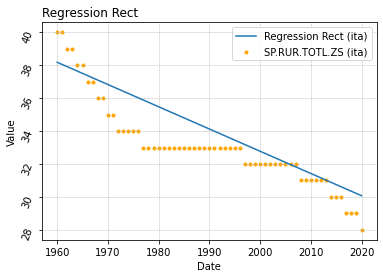

In [18]:
retta_reg(ind_1, country).show()
retta_reg(ind_2, country).show()
retta_reg(ind_3, country).show()